<a href="https://colab.research.google.com/github/CMOONCS/NLP-Gender-Bias/blob/main/WordEmbedding__NLPBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Bias-- a brief introduction using a pretrainined word embedding model
<i> **Note:** To make and save the changes to the colab notebook go to 'File -> Save a copy in Drive' </i>

***Instruction *** ->For executing steps run cell as shown in the figure:
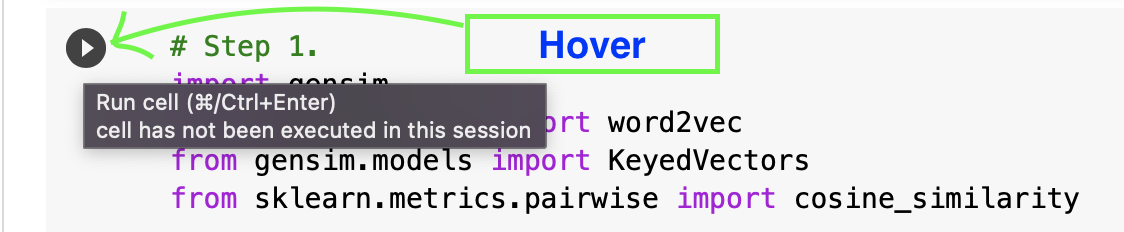





## <b> Step 1. Import important libraries for experiments !
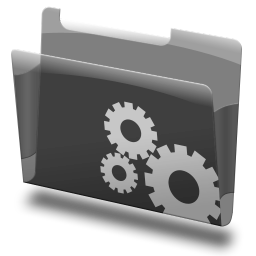

**Step 1a.** : Import packages from gensim and sklean python libraries 

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

**Step 1b.** : Use Gensim API to download several different corpora and pretrained models

In [3]:
import gensim.downloader as api


**Step 1c.** : Load a pretrained word embedding model 

In [4]:
model = api.load("glove-wiki-gigaword-50")


[==================================================] 100.0% 66.0/66.0MB downloaded


##**Step 2. Explore the model**
Now we have a word embedding model which assigns a combination of values to all words present in the vocabulary of the model. In this case, each word is represented as combination of 50 numbers which are also called as 'dimensions of the word representation'.  Lets explore words embeding further!!

**Step 2a**. : For a given word find values assigned by the models and known as word representation (or word embedding).

***Instruction**: write the word in single quotes as shown in the figure below:
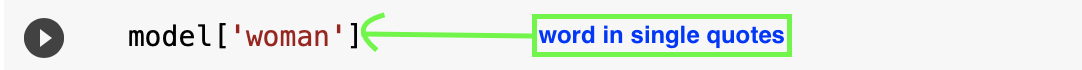 

In [5]:
model['woman']

array([-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
        1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
        2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
       -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.4436e-02,  2.3725e-01,
       -5.3799e-01,  1.7773e+00, -6.6433e-02,  6.9795e-01,  6.9291e-01,
       -2.6739e+00, -7.6805e-01,  3.3929e-01,  1.9695e-01, -3.5245e-01,
        2.2920e+00, -2.7411e-01, -3.0169e-01,  8.5286e-04,  1.6923e-01,
        9.1433e-02, -2.3610e-02,  3.6236e-02,  3.4488e-01, -8.3947e-01,
       -2.5174e-01,  4.2123e-01,  4.8616e-01,  2.2325e-02,  5.5760e-01,
       -8.5223e-01, -2.3073e-01, -1.3138e+00,  4.8764e-01, -1.0467e-01],
      dtype=float32)

**Step 2b.** : Find a few most similar word for a given word according to word **represenation** (values) assigned by the model :

In [ ]:
model.most_similar('woman')

[('girl', 0.9065280556678772),
 ('man', 0.8860336542129517),
 ('mother', 0.8763703107833862),
 ('her', 0.86131352186203),
 ('boy', 0.8596119284629822),
 ('she', 0.8430695533752441),
 ('herself', 0.8224567770957947),
 ('child', 0.8108214735984802),
 ('wife', 0.8037394881248474),
 ('old', 0.7982394695281982)]

**Step2c.**: Find top-5 similar words

In [ ]:
model.most_similar("doctor", topn= 5)

[('nurse', 0.7977497577667236),
 ('physician', 0.7965210676193237),
 ('patient', 0.7611691951751709),
 ('child', 0.7558937668800354),
 ('teacher', 0.7538284659385681)]

**Step 2d.**: Find simliarity of two words 

In [ ]:
model.similarity('dad','grandfather')

0.6845182

## **Step 3.  Introducing gender bias present in the model using analogy**

Define analogy function

In [ ]:
def analogy(a,b,c):
  ans = model.most_similar(positive=[b,c],negative=[a],topn =1) # E.g., woman+king-man =queen
  print ('Answer: ', ans[0][0])

Use this funtion to find an answer for the query words (triples)


In [ ]:
analogy('man','woman', 'king')

Answer:  queen


In [ ]:
analogy('apple','red', 'orange')

Answer:  yellow


In [ ]:
analogy('russia','moscow', 'france')

Answer:  paris


In [ ]:
analogy('he','she', 'father')

Answer:  mother


In [ ]:
analogy('he','she', 'boy')

In [ ]:
analogy('he','she', 'handsome')

In [ ]:
analogy('he','she', 'schoolteacher')

In [ ]:
analogy('he','she', 'doctor')

In [ ]:
analogy('she','he', 'nurse')

In [ ]:
analogy('she','he', 'receptionist')

In [ ]:
analogy('he','she', 'pilot')

In [ ]:
analogy('he','she', 'chef')